# Continuous matrix completion

In [ ]:
from utils import *
import json
import matplotlib.pyplot as plt

## Recovering synthetic data using standard matrix completion

### Tuning the learning rate for SGD

In [2]:
A = syntheticA(175)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 2
p = 1/3
B = 80

In [3]:
data = []
lr_list = [2**i for i in range(7)]

for lr in lr_list:
    I = bernoulli(A, p)
    X, Y = initial(A, r)
    data.append(optimise(X, Y, A, I, lr=lr, true_err_fn=true_err_fn, B=B, dk=1000, K=10000))
   

Best mean completion error: 0.40348973870277405
Best mean completion error: 7.629124638697249e-07
Best mean completion error: 3.5546511867323716e-07
Best mean completion error: 1.568377143712496e-07
Best mean completion error: 7.188839390437352e-08
Best mean completion error: 6.617313630385979e-08
Best mean completion error: 1.0290096952303429e-07


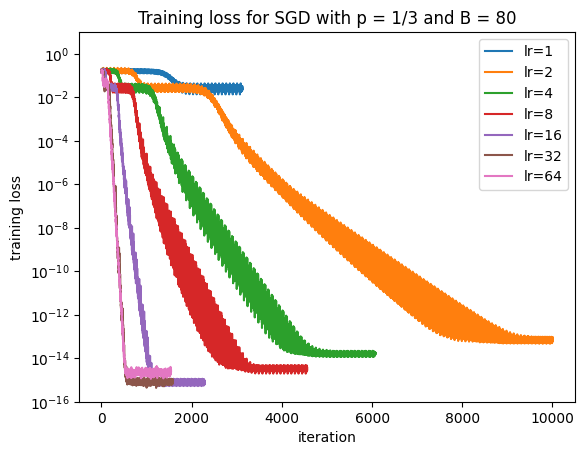

In [4]:
for i in range(len(data)):
    plt.semilogy(data[i]["train_loss_list"], label=f"lr={2**i}")
plt.title(f"Training loss for SGD with p = 1/3 and B = {B}")
plt.xlabel("iteration")
plt.ylabel("training loss")
plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")

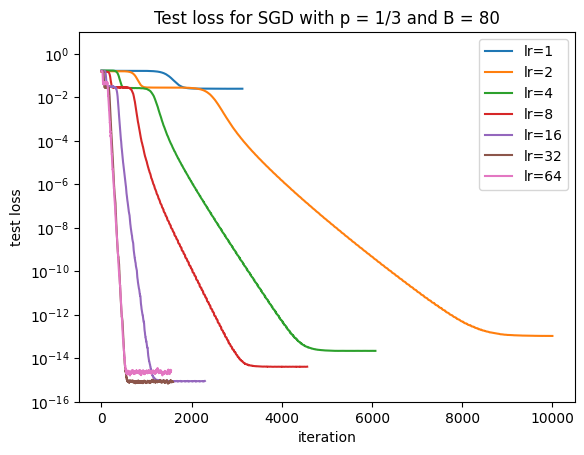

In [5]:
for i in range(len(data)):
    plt.semilogy(data[i]["test_loss_list"], label=f"lr={2**i}")
plt.title(f"Test loss for SGD with p = 1/3 and B = {B}")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")

### Comparing the test loss and mean completion error

In [6]:
A = syntheticA(175)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 2
p = 1/3
B = 80
I = bernoulli(A, p)

In [7]:
# SGD
X, Y = initial(A,r) 
res_sgd_syn = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=B, dk=1000, K=3000, k_true=1)

Best mean completion error: 6.796209817139243e-08


In [8]:
# Adam
X, Y = initial(A, r)
res_adam_syn = optimise(X, Y, A, I, "adam", lr=0.01, true_err_fn=true_err_fn, B=B, dk=1000, K=3000, k_true=1)

Best mean completion error: 2.5183592811117705e-07


In [9]:
# ASD
X, Y = initial(A, r)
res_asd_syn = asd(X, Y,A, I, true_err_fn=true_err_fn, B=B, dk=1000, K=3000, k_true=1)

Best mean completion error: 1.335617270115108e-07


(1e-16, 100.0)

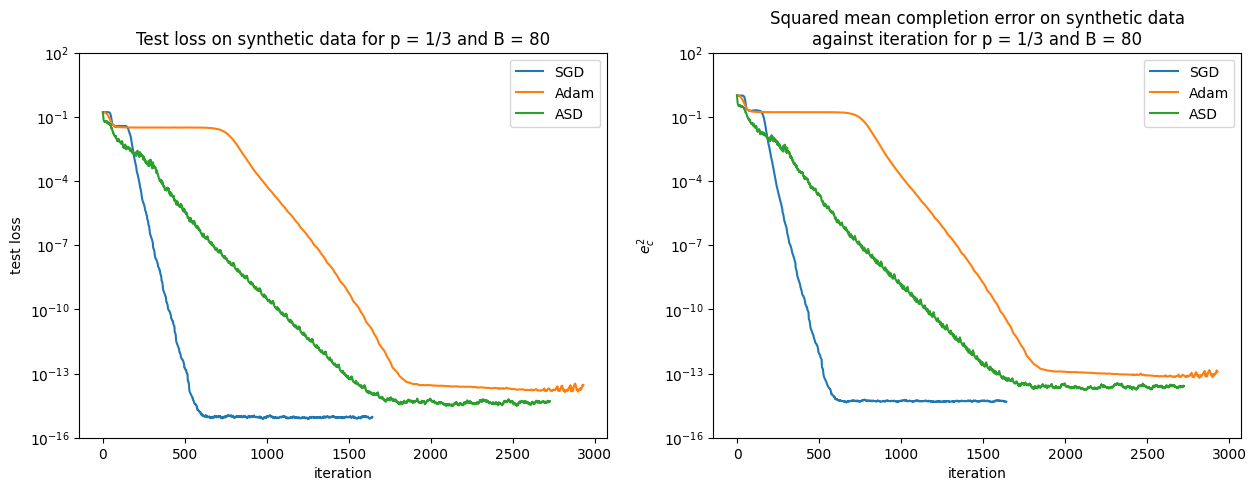

In [10]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
loss_str = "test_loss_list"
ax.semilogy(res_sgd_syn[loss_str], label="SGD")
ax.semilogy(res_adam_syn[loss_str], label="Adam")
ax.semilogy(res_asd_syn[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Test loss on synthetic data for p = 1/3 and B = {B}")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")
ax.set_ylim((1e-16, 1e2))

ax = fig.add_subplot(1,2,2)
loss_str = "true_err_list"
ax.semilogy(np.array(res_sgd_syn[loss_str])**2, label="SGD")
ax.semilogy(np.array(res_adam_syn[loss_str])**2, label="Adam")
ax.semilogy(np.array(res_asd_syn[loss_str])**2, label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Squared mean completion error on synthetic data\nagainst iteration for p = 1/3 and B = {B}")
ax.set_xlabel("iteration")
ax.set_ylabel(r"$e_{c}^{2}$")
ax.set_ylim((1e-16, 1e2))

### Testing the effect of over-estimating the rank

In [11]:
A = syntheticA(60)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
p = 1/3
B = 10
K = 4000
dk = 250
k_test = 250
I = bernoulli(A, p)

In [12]:
# SGD.
sgd_mean_syn_list = []
sgd_sd_syn_list = []
for r in range(1,26):
    err_list = []
    print(f"Rank: {r}")
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    sgd_mean_syn_list.append(np.mean(err_list).item())
    sgd_sd_syn_list.append(np.std(err_list).item())

Rank: 1
Best mean completion error: 0.4600197970867157
Best mean completion error: 0.46780648827552795
Best mean completion error: 0.504915177822113
Best mean completion error: 0.470568984746933
Best mean completion error: 0.4545830488204956
Rank: 2
Best mean completion error: 7.470960383670899e-08
Best mean completion error: 6.994621770672893e-08
Best mean completion error: 7.685297020998405e-08
Best mean completion error: 7.181058947480778e-08
Best mean completion error: 7.513636290923387e-08
Rank: 3
Best mean completion error: 9.70780456555076e-05
Best mean completion error: 8.018956577870995e-05
Best mean completion error: 0.0002984673192258924
Best mean completion error: 4.639851613319479e-05
Best mean completion error: 0.00010665130685083568
Rank: 4
Best mean completion error: 0.0004201562551315874
Best mean completion error: 0.00020083083654753864
Best mean completion error: 0.00015830833581276238
Best mean completion error: 0.000623847940005362
Best mean completion error: 0.000

In [13]:
# Adam.
adam_mean_syn_list = []
adam_sd_syn_list = []
for r in range(1,26):
    err_list = []
    print(f"Rank: {r}")
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = optimise(X, Y, A, I, "adam", lr=0.02, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    adam_mean_syn_list.append(np.mean(err_list).item())
    adam_sd_syn_list.append(np.std(err_list).item())

Rank: 1
Best mean completion error: 0.42654949426651
Best mean completion error: 0.42280682921409607
Best mean completion error: 0.42313694953918457
Best mean completion error: 0.42415088415145874
Best mean completion error: 0.4259849488735199
Rank: 2
Best mean completion error: 3.3884705885611766e-07
Best mean completion error: 4.1245351667384966e-07
Best mean completion error: 2.1880623535253108e-07
Best mean completion error: 1.3987547617944074e-06
Best mean completion error: 5.623867400572635e-05
Rank: 3
Best mean completion error: 0.0005108959740027785
Best mean completion error: 0.0003941716277040541
Best mean completion error: 0.0007428453536704183
Best mean completion error: 0.004710533190518618
Best mean completion error: 0.0015750782331451774
Rank: 4
Best mean completion error: 0.0017069348832592368
Best mean completion error: 0.0010491869179531932
Best mean completion error: 0.0017008724389597774
Best mean completion error: 0.0032059887889772654
Best mean completion error: 0

In [14]:
# Mini-batch ASD 1.
asd1_mean_syn_list = []
asd1_sd_syn_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    asd1_mean_syn_list.append(np.mean(err_list).item())
    asd1_sd_syn_list.append(np.std(err_list).item())

1
Best mean completion error: 0.5611447691917419
Best mean completion error: 0.5435251593589783
Best mean completion error: 0.5469390749931335
Best mean completion error: 0.5247724652290344
Best mean completion error: 0.5426086187362671
2
Best mean completion error: 7.751740582762068e-08
Best mean completion error: 9.485886920401754e-08
Best mean completion error: 9.585999549699409e-08
Best mean completion error: 8.725574929258073e-08
Best mean completion error: 9.347455431907292e-08
3
Best mean completion error: 0.008324883878231049
Best mean completion error: 9.45659550666278e-08
Best mean completion error: 1.072459383522073e-07
Best mean completion error: 0.04835795238614082
Best mean completion error: 9.067506567816963e-08
4
Best mean completion error: 0.09168224036693573
Best mean completion error: 0.04188248887658119
Best mean completion error: 0.07157906144857407
Best mean completion error: 0.02384040132164955
Best mean completion error: 0.0062448326498270035
5
Best mean complet

In [15]:
# Mini-batch ASD 2.
asd2_mean_syn_list = []
asd2_sd_syn_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, db=B//2, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    asd2_mean_syn_list.append(np.mean(err_list).item())
    asd2_sd_syn_list.append(np.std(err_list).item())

1
Best mean completion error: 0.5155550837516785
Best mean completion error: 0.5179923176765442
Best mean completion error: 0.5090528130531311
Best mean completion error: 0.4971955120563507
Best mean completion error: 0.5284231305122375
2
Best mean completion error: 8.389836381184068e-08
Best mean completion error: 8.14796266013218e-08
Best mean completion error: 8.621773872619087e-08
Best mean completion error: 8.752707003623073e-08
Best mean completion error: 8.013924457372923e-08
3
Best mean completion error: 0.017896592617034912
Best mean completion error: 0.0004302025481592864
Best mean completion error: 0.02352140098810196
Best mean completion error: 0.04207492992281914
Best mean completion error: 0.02290509082376957
4
Best mean completion error: 0.016357894986867905
Best mean completion error: 0.0032380097545683384
Best mean completion error: 0.07158677279949188
Best mean completion error: 0.026897871866822243
Best mean completion error: 0.0010661614360287786
5
Best mean complet

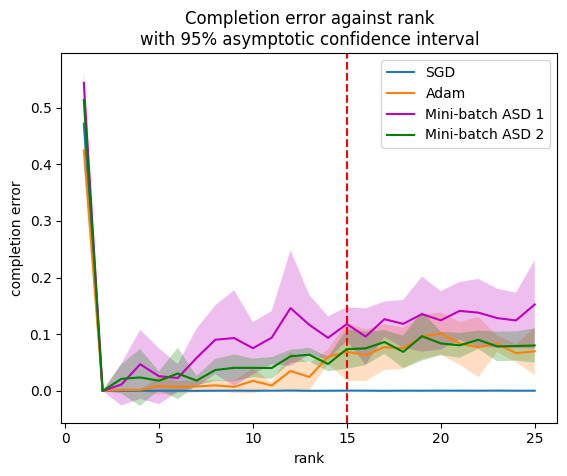

In [49]:
plt.axvline(x=15, ls='--', c='red')

# SGD
plt.plot(np.arange(1,26),sgd_mean_syn_list, label="SGD")
sgd_upper = np.array(sgd_mean_syn_list) + 1.96 * np.array(sgd_sd_syn_list)
sgd_lower = np.array(sgd_mean_syn_list) - 1.96 * np.array(sgd_sd_syn_list)
plt.fill_between(np.arange(1,26),sgd_lower, sgd_upper, alpha=0.25)

# Adam
plt.plot(np.arange(1,26),adam_mean_syn_list, label="Adam")
adam_upper = np.array(adam_mean_syn_list) + 1.96 * np.array(adam_sd_syn_list)
adam_lower = np.array(adam_mean_syn_list) - 1.96 * np.array(adam_sd_syn_list)
plt.fill_between(np.arange(1,26),adam_lower, adam_upper, alpha=0.25)

# Mini-batch ASD 1
plt.plot(np.arange(1,26),asd1_mean_syn_list, "m", label="Mini-batch ASD 1")
asd_upper = np.array(asd1_mean_syn_list) + 1.96 * np.array(asd1_sd_syn_list)
asd_lower = np.array(asd1_mean_syn_list) - 1.96 * np.array(asd1_sd_syn_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="m", alpha=0.25)

# Mini-batch ASD 2
plt.plot(np.arange(1,26),asd2_mean_syn_list, "g", label="Mini-batch ASD 2")
asd_upper = np.array(asd2_mean_syn_list) + 1.96 * np.array(asd2_sd_syn_list)
asd_lower = np.array(asd2_mean_syn_list) - 1.96 * np.array(asd2_sd_syn_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="g", alpha=0.25)

plt.title("Completion error against rank\nwith 95% asymptotic confidence interval")
plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")

## Recovering spectromicroscopy data using standard matrix completion

### Effects of mini-batching

#### Comparing all the algorithms with and without mini-batching

In [17]:
file = np.load("data.npz")
A = torch.tensor(file["Y"], dtype=torch.float32).reshape((25**2, 49))
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 5
p = 1/3
B = 40
K = 3000
k_test = 250
I = bernoulli(A, p)

In [18]:
# SGD without mini-batching.
X, Y = initial(A, r) 
res_sgd_real_b1 = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=1, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.040112465620040894


In [19]:
# Adam without mini-batching.
X, Y = initial(A, r) 
res_adam_real_b1 = optimise(X, Y, A, I, "adam", lr=0.1, true_err_fn=true_err_fn, B=1, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.0448480062186718


In [20]:
# ASD without mini-batching.
X, Y = initial(A, r) 
res_asd_real_b1 = asd(X, Y, A, I, true_err_fn=true_err_fn, B=1, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.0422460101544857


In [21]:
# SGD with B mini-batches.
X, Y = initial(A, r) 
res_sgd_real_B = optimise(X, Y, A, I, lr=8, true_err_fn=true_err_fn, B=B, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.04288949444890022


In [22]:
# Adam with B mini-batches.
X, Y = initial(A, r) 
res_adam_real_B = optimise(X, Y, A, I, "adam", lr=0.02, true_err_fn=true_err_fn, B=B, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.057407379150390625


In [23]:
# Mini-batch ASD 2 with B mini-batches.
X, Y = initial(A, r) 
res_asd_real_B = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, db=B//2, dk=K, K=K, k_test=k_test)

Best mean completion error: 0.05539612099528313


Text(0, 0.5, 'test loss')

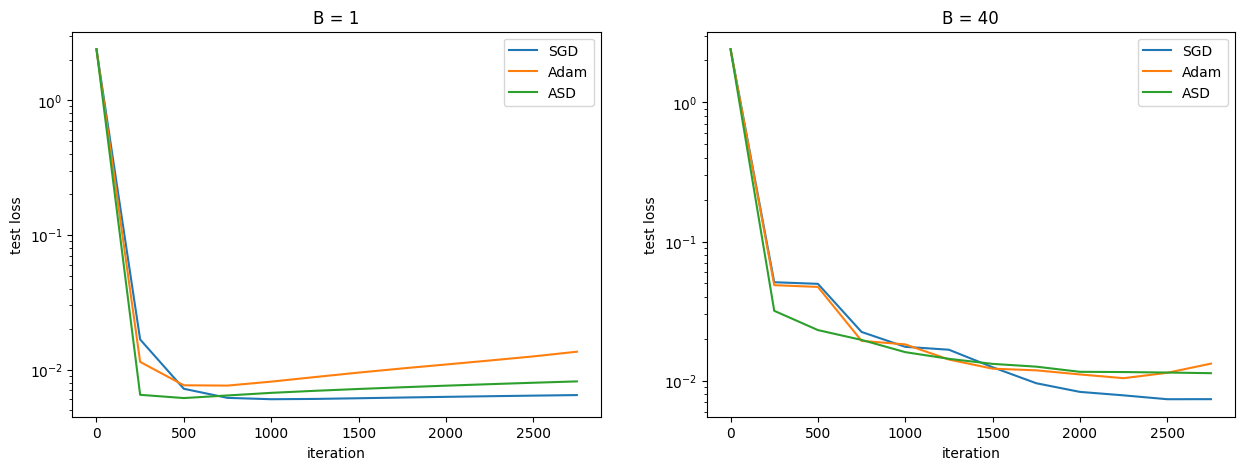

In [ ]:
loss_str = "test_loss_list"
index_arr = np.arange(0, K, k_test)
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.semilogy(index_arr, res_sgd_real_b1[loss_str], label="SGD")
ax.semilogy(index_arr, res_adam_real_b1[loss_str], label="Adam")
ax.semilogy(index_arr, res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title("B = 1")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
ax.semilogy(index_arr, res_sgd_real_B[loss_str], label="SGD")
ax.semilogy(index_arr, res_adam_syn_B[loss_str], label="Adam")
ax.semilogy(index_arr, res_asd_syn_B[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = {B}")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

(-0.25, 8.0)

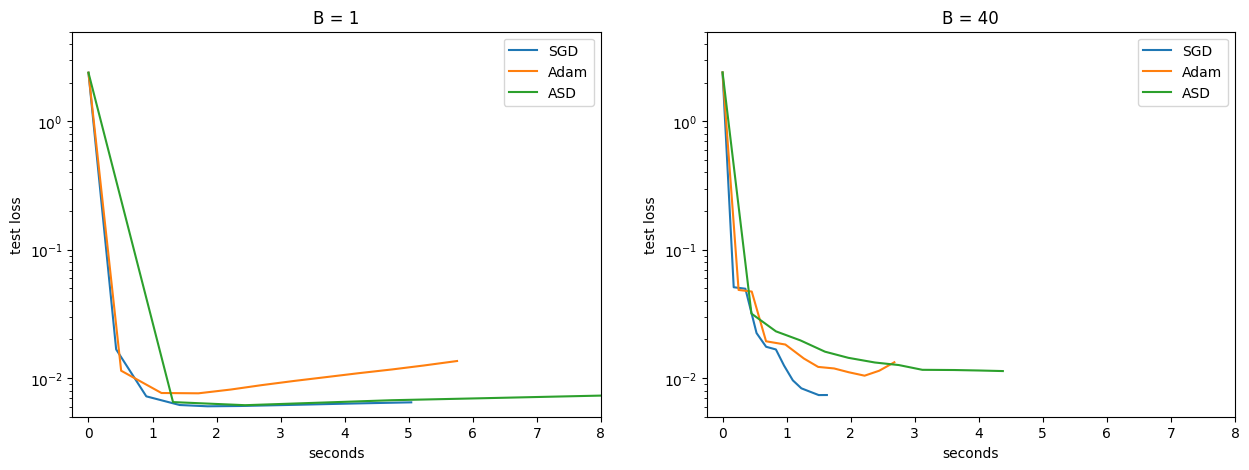

In [25]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
index_arr = np.arange(0, K, k_test)

ax = fig.add_subplot(1,2,1)
ax.semilogy(np.array(res_sgd_real_b1["timestamps"])[index_arr] - res_sgd_real_b1["timestamps"][0], 
            res_sgd_real_b1[loss_str], 
            label="SGD")
ax.semilogy(np.array(res_adam_real_b1["timestamps"])[index_arr] - res_adam_real_b1["timestamps"][0], 
            res_adam_real_b1[loss_str], 
            label="Adam")
ax.semilogy(np.array(res_asd_real_b1["timestamps"])[index_arr] - res_asd_real_b1["timestamps"][0], 
            res_asd_real_b1[loss_str], 
            label="ASD")
ax.legend(loc="upper right")
ax.set_title("B = 1")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((5e-3,5))
ax.set_xlim((-0.25,8))

ax = fig.add_subplot(1,2,2)
ax.semilogy(np.array(res_sgd_real_B["timestamps"])[index_arr] - res_sgd_real_B["timestamps"][0], 
            res_sgd_real_B[loss_str], 
            label="SGD")
ax.semilogy(np.array(res_adam_real_B["timestamps"])[index_arr] - res_adam_real_B["timestamps"][0], 
            res_adam_real_B[loss_str], 
            label="Adam")
ax.semilogy(np.array(res_asd_real_B["timestamps"])[index_arr] - res_asd_real_B["timestamps"][0], 
            res_asd_real_B[loss_str], 
            label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = {B}")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((5e-3,5))
ax.set_xlim((-0.25,8))

#### Comparing SGD and Adam for various numbers of mini-batches

In [26]:
file = np.load("data.npz")
A = torch.tensor(file["Y"], dtype=torch.float32).reshape((25**2, 49))
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 5
p = 1/3
B = 40
K = 4000
k_test = 250
B_list = [1, 10, 20, 40, 80]
I = bernoulli(A, p)

In [27]:
# SGD.
sgd_batch_list = []
for B in B_list:
    X, Y = initial(A, r)  
    sgd_batch_list.append(optimise(X, Y, A, I, lr=8, true_err_fn=true_err_fn, B=B, dk=K, K=K))

Best mean completion error: 0.03972863033413887
Best mean completion error: 0.04317856952548027
Best mean completion error: 0.04013434052467346
Best mean completion error: 0.041041333228349686
Best mean completion error: 0.04521637037396431


In [28]:
# Adam.
adam_batch_list = []
for B in B_list:
    X, Y = initial(A, r) 
    adam_batch_list.append(optimise(X, Y, A, I, "adam", lr=0.01, true_err_fn=true_err_fn, B=B, dk=K, K=K))

Best mean completion error: 0.04195148125290871
Best mean completion error: 0.04145478084683418
Best mean completion error: 0.0410672165453434
Best mean completion error: 0.04667520523071289
Best mean completion error: 0.05622544884681702


Text(0, 0.5, 'test loss')

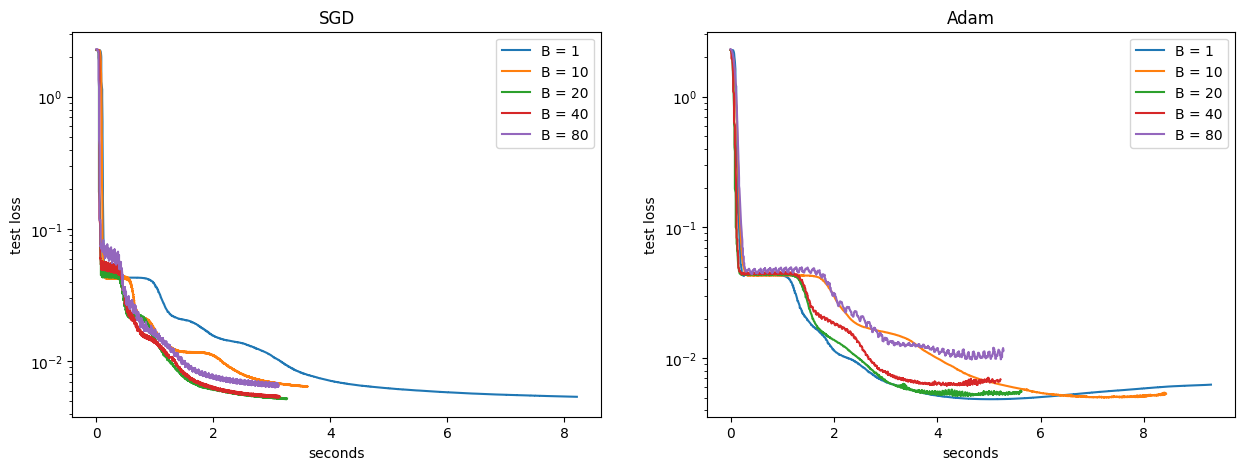

In [29]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
for i in range(len(sgd_batch_list)):
    ax.semilogy(np.array(sgd_batch_list[i]["timestamps"]) - sgd_batch_list[i]["timestamps"][0], 
                 sgd_batch_list[i][loss_str], 
                 label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("SGD")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
for i in range(len(adam_batch_list)):
    ax.semilogy(np.array(adam_batch_list[i]["timestamps"]) - adam_batch_list[i]["timestamps"][0], 
                 adam_batch_list[i][loss_str], 
                 label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("Adam")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")

#### Comparing mini-batching schemes for ASD

In [30]:
file = np.load("data.npz")
A = torch.tensor(file["Y"], dtype=torch.float32).reshape((25**2, 49))
true_err_fn = lambda X, Y: completion_err(X, Y, A)
r = 5
p = 1/3
B = 40
K = 4000
k_test = 250
B_list = [1, 10, 20, 40, 80]
I = bernoulli(A, p)

In [31]:
# Batch test
asd1_batch_list = []
for B in B_list:
    X, Y = initial(A, r) 
    asd1_batch_list.append(asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, dk=K, K=K))

Best mean completion error: 0.040503330528736115
Best mean completion error: 0.04573046416044235
Best mean completion error: 0.14636771380901337
Best mean completion error: 0.25077223777770996
Best mean completion error: 0.23949086666107178


In [32]:
# Mini-batch ASD 2.
asd2_batch_list = []
for B in B_list:
    X, Y = initial(A, r) 
    asd2_batch_list.append(asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, db=B//2, dk=K, K=K))

Best mean completion error: 0.03888906538486481
Best mean completion error: 0.04144363850355148
Best mean completion error: 0.04496460035443306
Best mean completion error: 0.04964994266629219
Best mean completion error: 0.058174289762973785


Text(0, 0.5, 'test loss')

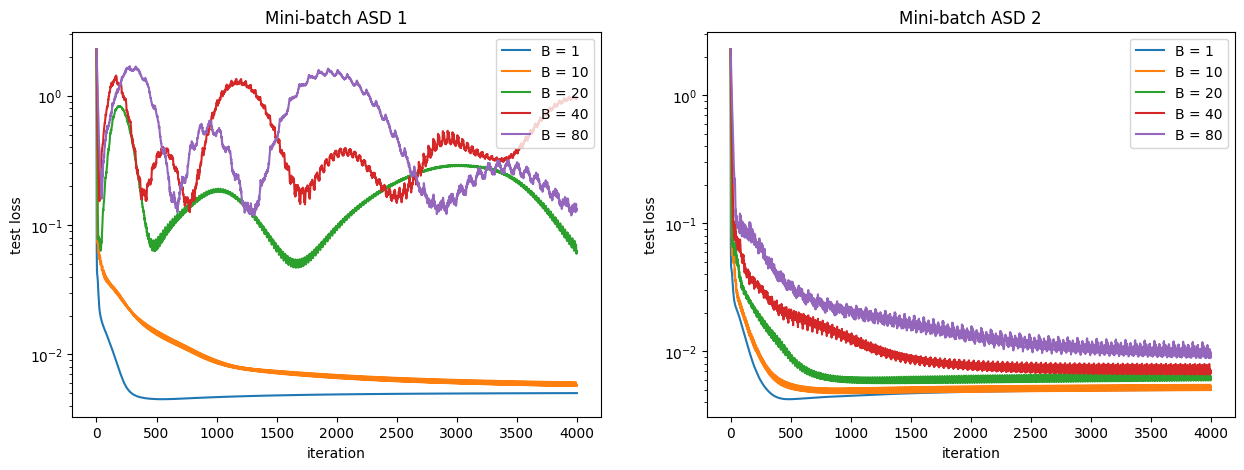

In [33]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
for i in range(len(asd1_batch_list)):
    ax.semilogy(asd1_batch_list[i][loss_str], label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("Mini-batch ASD 1")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
loss_str = "test_loss_list"
for i in range(len(asd2_batch_list)):
    ax.semilogy(asd2_batch_list[i][loss_str], label=f"B = {B_list[i]}")
ax.legend(loc="upper right")
ax.set_title("Mini-batch ASD 2")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

### Finding the optimal rank

In [34]:
file = np.load("data.npz")
A = torch.tensor(file["Y"], dtype=torch.float32).reshape((25**2, 49))
true_err_fn = lambda X, Y: completion_err(X, Y, A)
p = 1/3
B = 10
K = 4000
dk = 250
k_test = 250
I = bernoulli(A, p)

In [35]:
# SGD.
sgd_mean_real_list = []
sgd_sd_real_list = []
for r in range(1,26):
    err_list = []
    print(f"Rank: {r}")
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = optimise(X, Y, A, I, lr=32, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    sgd_mean_real_list.append(np.mean(err_list))
    sgd_sd_real_list.append(np.std(err_list))

Rank: 1
Best mean completion error: 0.14967770874500275
Best mean completion error: 0.1470792442560196
Best mean completion error: 0.14441530406475067
Best mean completion error: 0.14763368666172028
Best mean completion error: 0.14175568521022797
Rank: 2
Best mean completion error: 0.09590969979763031
Best mean completion error: 0.09545082598924637
Best mean completion error: 0.09771739691495895
Best mean completion error: 0.09521325677633286
Best mean completion error: 0.09848414361476898
Rank: 3
Best mean completion error: 0.07621218264102936
Best mean completion error: 0.07475395500659943
Best mean completion error: 0.07576575875282288
Best mean completion error: 0.076864093542099
Best mean completion error: 0.07569921016693115
Rank: 4
Best mean completion error: 0.06189880520105362
Best mean completion error: 0.05831003934144974
Best mean completion error: 0.0599483996629715
Best mean completion error: 0.06888867914676666
Best mean completion error: 0.062186069786548615
Rank: 5
Bes

In [36]:
# Adam.
adam_mean_real_list = []
adam_sd_real_list = []
for r in range(1,26):
    err_list = []
    print(f"Rank: {r}")
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = optimise(X, Y, A, I, "adam", lr=0.02, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    adam_mean_real_list.append(np.mean(err_list))
    adam_sd_real_list.append(np.std(err_list))

Rank: 1
Best mean completion error: 0.13339202105998993
Best mean completion error: 0.13311545550823212
Best mean completion error: 0.13315421342849731
Best mean completion error: 0.1343953013420105
Best mean completion error: 0.13420672714710236
Rank: 2
Best mean completion error: 0.13383285701274872
Best mean completion error: 0.13325496017932892
Best mean completion error: 0.13265135884284973
Best mean completion error: 0.13341698050498962
Best mean completion error: 0.13321880996227264
Rank: 3
Best mean completion error: 0.07415102422237396
Best mean completion error: 0.07570848613977432
Best mean completion error: 0.07407142221927643
Best mean completion error: 0.07263870537281036
Best mean completion error: 0.07432883232831955
Rank: 4
Best mean completion error: 0.06360749155282974
Best mean completion error: 0.05943888798356056
Best mean completion error: 0.05742945894598961
Best mean completion error: 0.061539217829704285
Best mean completion error: 0.06001286208629608
Rank: 5


In [37]:
# Mini-batch ASD 1.
asd1_mean_real_list = []
asd1_sd_real_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    asd1_mean_real_list.append(np.mean(err_list))
    asd1_sd_real_list.append(np.std(err_list))

1
Best mean completion error: 0.14975281059741974
Best mean completion error: 0.15186674892902374
Best mean completion error: 0.1531732976436615
Best mean completion error: 0.15140117704868317
Best mean completion error: 0.15265940129756927
2
Best mean completion error: 0.10219881683588028
Best mean completion error: 0.10286668688058853
Best mean completion error: 0.10209023207426071
Best mean completion error: 0.09986589103937149
Best mean completion error: 0.10182385891675949
3
Best mean completion error: 0.08301947265863419
Best mean completion error: 0.08634092658758163
Best mean completion error: 0.09805433452129364
Best mean completion error: 0.08284812420606613
Best mean completion error: 0.09095727652311325
4
Best mean completion error: 0.07999834418296814
Best mean completion error: 0.06911394000053406
Best mean completion error: 0.06762436032295227
Best mean completion error: 0.06945386528968811
Best mean completion error: 0.07380394637584686
5
Best mean completion error: 0.1

In [38]:
# Mini-batch ASD 2.
asd2_mean_real_list = []
asd2_sd_real_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(A, p)
        X, Y = initial(A, r) 
        res = asd(X, Y, A, I, true_err_fn=true_err_fn, B=B, db=B//2, dk=dk, K=K, k_test=k_test)
        X, Y = res["best_params"]
        err_list.append(true_err_fn(X, Y))
    
    asd2_mean_real_list.append(np.mean(err_list))
    asd2_sd_real_list.append(np.std(err_list))

1
Best mean completion error: 0.15334418416023254
Best mean completion error: 0.15131868422031403
Best mean completion error: 0.15413381159305573
Best mean completion error: 0.152389794588089
Best mean completion error: 0.15328817069530487
2
Best mean completion error: 0.10165578871965408
Best mean completion error: 0.09889734536409378
Best mean completion error: 0.10187449306249619
Best mean completion error: 0.10129838436841965
Best mean completion error: 0.0995909720659256
3
Best mean completion error: 0.07938671857118607
Best mean completion error: 0.07920656353235245
Best mean completion error: 0.08358209580183029
Best mean completion error: 0.07952605932950974
Best mean completion error: 0.08419347554445267
4
Best mean completion error: 0.06820881366729736
Best mean completion error: 0.0648704394698143
Best mean completion error: 0.06882642209529877
Best mean completion error: 0.06494516134262085
Best mean completion error: 0.06450282782316208
5
Best mean completion error: 0.0490

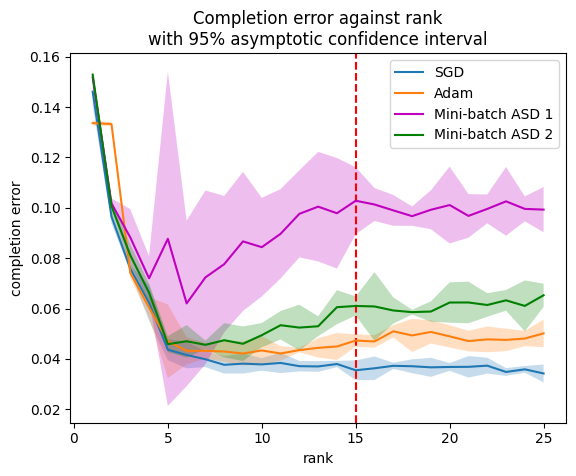

In [50]:
plt.axvline(x=15, ls='--', c='red')

# SGD
plt.plot(np.arange(1,26),sgd_mean_real_list, label="SGD")
sgd_upper = np.array(sgd_mean_real_list) + 1.96 * np.array(sgd_sd_real_list)
sgd_lower = np.array(sgd_mean_real_list) - 1.96 * np.array(sgd_sd_real_list)
plt.fill_between(np.arange(1,26),sgd_lower, sgd_upper, alpha=0.25)

# Adam
plt.plot(np.arange(1,26),adam_mean_real_list, label="Adam")
adam_upper = np.array(adam_mean_real_list) + 1.96 * np.array(adam_sd_real_list)
adam_lower = np.array(adam_mean_real_list) - 1.96 * np.array(adam_sd_real_list)
plt.fill_between(np.arange(1,26),adam_lower, adam_upper, alpha=0.25)

# Mini-batch ASD 1
plt.plot(np.arange(1,26),asd1_mean_real_list, "m", label="Mini-batch ASD 1")
asd_upper = np.array(asd1_mean_real_list) + 1.96 * np.array(asd1_sd_real_list)
asd_lower = np.array(asd1_mean_real_list) - 1.96 * np.array(asd1_sd_real_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="m", alpha=0.25)

# Mini-batch ASD 2
plt.plot(np.arange(1,26),asd2_mean_real_list, "g", label="Mini-batch ASD 2")
asd_upper = np.array(asd2_mean_real_list) + 1.96 * np.array(asd2_sd_real_list)
asd_lower = np.array(asd2_mean_real_list) - 1.96 * np.array(asd2_sd_real_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="g", alpha=0.25)

plt.title("Completion error against rank\nwith 95% asymptotic confidence interval")
plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")

#### Saving experiment data

In [52]:
experiment_data = {
  "sgd_mean_syn_list": sgd_mean_syn_list,
  "sgd_sd_syn_list": sgd_sd_syn_list,
  "adam_mean_syn_list": adam_mean_syn_list,
  "adam_sd_syn_list": adam_sd_syn_list,
  "asd1_mean_syn_list": asd1_mean_syn_list,
  "asd1_sd_syn_list": asd1_sd_syn_list,
  "asd2_mean_syn_list": asd2_mean_syn_list,
  "asd2_sd_syn_list": asd2_sd_syn_list,
  "sgd_mean_real_list": sgd_mean_real_list,
  "sgd_sd_real_list": sgd_sd_real_list,
  "adam_mean_real_list": adam_mean_real_list,
  "adam_sd_real_list": adam_sd_real_list,
  "asd1_mean_real_list": asd1_mean_real_list,
  "asd1_sd_real_list": asd1_sd_real_list,
  "asd2_mean_real_list": asd2_mean_real_list,
  "asd2_sd_real_list": asd2_sd_real_list,
}

In [53]:
with open('experiment_data.json', 'w') as file:
  file.write(json.dumps(experiment_data))

## Recovering synthetic data using continuous matrix completion

In [41]:
n = 175
A = syntheticA(n)
true_err_fn = lambda X, Y: completion_err(X, Y, A)
p = 1/3
r = 2
B = 10
K = 2500
k_test = 250
I = bernoulli(A, p) # Discrete indexing.
I_cont = (I + torch.rand(I.size(0), 2)) # Continuous indexing.
F = syntheticF(I_cont/n) # Sampled values.

In [42]:
# SGD with discrete indexing.
X, Y = initial(A,r) 
res_sgd_syn_cI = optimise(X, Y, F, I, lr=16, loss=mse_loss_cont, true_err_fn=true_err_fn, 
                          B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 0.008574320934712887


In [43]:
# Adam with discrete indexing.
X, Y = initial(A, r)
res_adam_syn_cI = optimise(X, Y, F, I, "adam", loss=mse_loss_cont, lr=0.01, 
                           true_err_fn=true_err_fn, 
                           B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 0.008536217734217644


In [44]:
# ASD with discrete indexing.
X, Y = initial(A, r)
res_asd_syn_cI = asd(X, Y, F, I, train_loss_fn=asd_loss_cont, 
                     test_loss_fn=asd_loss_cont, true_err_fn=true_err_fn, 
                     B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 0.009078375063836575


In [45]:
# SGD with continuous indexing.
X, Y = initial(A,r) 
res_sgd_syn_cX = optimise(X, Y, F, I_cont, lr=16, loss=mse_loss_cont, 
                          true_err_fn=true_err_fn, 
                          B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 1.8079508663504384e-05


In [46]:
# Adam with continuous indexing.
X, Y = initial(A, r)
res_adam_syn_cX = optimise(X, Y, F, I_cont, "adam", lr=0.01, loss=mse_loss_cont, 
                           true_err_fn=true_err_fn, 
                           B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 1.1047398402297404e-05


In [47]:
# ASD with continuous indexing.
X, Y = initial(A, r)

# Need to implement functions for different learning rates.
res_asd_syn_cX = asd(X, Y, F, I_cont, train_loss_fn=asd_loss_cont, 
                     test_loss_fn=asd_loss_cont, true_err_fn=true_err_fn,
                    lrX_fn=lrX_cont, lrY_fn=lrY_cont, B=B, dk=K, K=K, k_test=k_test, k_true=k_test)

Best mean completion error: 1.1297871424176265e-05


(5e-06, 2)

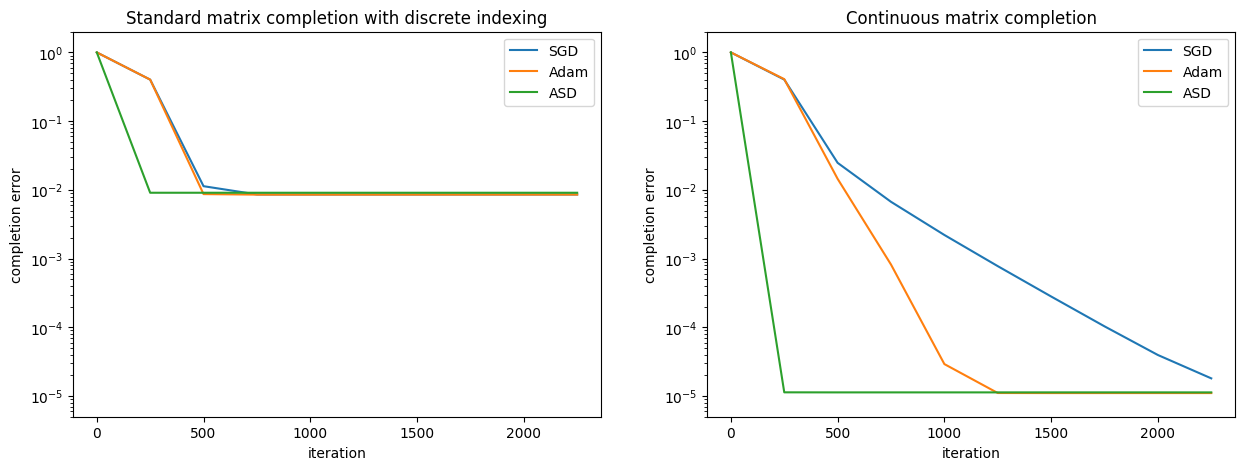

In [48]:
loss_str = "true_err_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.semilogy(np.arange(0, K, k_test), res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(np.arange(0, K, k_test), res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(np.arange(0, K, k_test), res_asd_syn_cI[loss_str], label="ASD")
ax.set_title(f"Standard matrix completion with discrete indexing")
ax.legend(loc="upper right")
ax.set_xlabel("iteration")
ax.set_ylabel("completion error")
ax.set_ylim((5e-6, 2))

ax = fig.add_subplot(1,2,2)
plt.semilogy(np.arange(0, K, k_test), res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(np.arange(0, K, k_test), res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(np.arange(0, K, k_test), res_asd_syn_cX[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Continuous matrix completion")
ax.set_xlabel("iteration")
ax.set_ylabel("completion error")
ax.set_ylim((5e-6, 2))